In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm  import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils
import torch.backends.cudnn as cudnn


from pytvision.datasets.factory import FactoryDataset 
from pytvision.datasets.datasets import Dataset
from pytvision.transforms import transforms as mtrans
from pytvision import visualization as view
from pytvision.datasets.datasets  import Dataset
from pytvision.datasets.factory  import FactoryDataset

sys.path.append('../')
# from torchlib.datasets.factory  import FactoryDataset 
# from torchlib.datasets.datasets import Dataset


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [41]:
pathname = '~/.datasets'
pathname = os.path.expanduser( pathname )
name_dataset=FactoryDataset.affectdark

print(pathname)
print(name_dataset)

/home/fernandez/.datasets
ferp


In [40]:
def visualizatedataset( data, num=25, imsize=(64,64,3), padding=1 ):    
    """
    Visualization data set
        @data: data loader 
        @num: number of images show
    """
    
    databatch = torch.zeros( [num, imsize[2], imsize[0], imsize[1]], dtype=torch.float32 )
    for i in range(num): 
        idx = i # np.random.randint( len(data) )
        databatch[i,...] = data[idx]['image']   
        
    grid = utils.make_grid( databatch , nrow= int(np.sqrt(num)), normalize=True, padding=padding )       
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    

In [42]:
dataloader = Dataset(
    data=FactoryDataset.factory(
        pathname=pathname, 
        name=name_dataset, 
        subset=FactoryDataset.validation, 
        download=True ),
    num_channels=3,
    transform=transforms.Compose([
        
        
        mtrans.ToResize( (48, 48), resize_mode='squash', padding_mode=cv2.BORDER_REPLICATE ),
        #mtrans.ToResize( (38, 38), resize_mode='squash', padding_mode=cv2.BORDER_REPLICATE ),
        #mtrans.ToPad( 5 , 5, padding_mode=cv2.BORDER_REPLICATE ) ,        
        #mtrans.ToResize( (60, 60), resize_mode='squash', padding_mode=cv2.BORDER_REPLICATE ),
        #mtrans.CenterCrop( (48, 48), padding_mode=cv2.BORDER_REPLICATE  ) , 
        
        
        
        mtrans.ToTensor(),
        mtrans.ToNormalization(),
        ])
    )

print(len(dataloader))
print(len( dataloader.data.classes ))
print( dataloader.data.class_to_idx )
# print( dataloader.data.classes )
# print(len(dataloader))
# print( dataloader.data.samples )

4000
8
{'Neutral - NE': 0, 'Happiness - HA': 1, 'Surprise - SU': 2, 'Sadness - SA': 3, 'Anger - AN': 4, 'Disgust - DI': 5, 'Fear - FR': 6, 'Contempt - CO': 7}


['Neutral - NE', 'Happiness - HA', 'Surprise - SU', 'Sadness - SA', 'Anger - AN', 'Disgust - DI', 'Fear - FR', 'Contempt - CO']
49


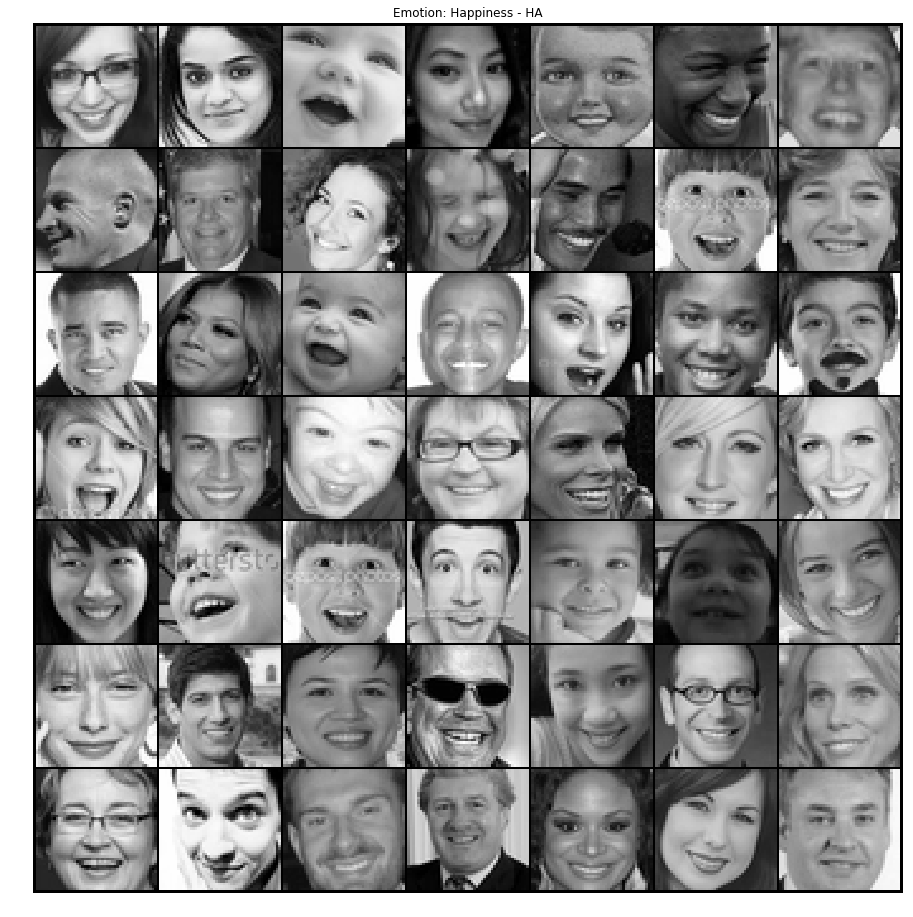

In [43]:
num=48
classes_select = 1
dataloader_select = []
k=0
labels = dataloader.labels
imsize = 48

for i in range( len(dataloader) ):
    if labels[i] != classes_select: 
        continue        
    dataloader_select.append(dataloader[i]); k+=1
    if k > num: break;

n = len(dataloader_select)

print(dataloader.data.classes)
print(n)


plt.figure( figsize=(16,16))
visualizatedataset(dataloader_select, num=n, imsize=(imsize,imsize,3) )
plt.title('Emotion: {}'.format( dataloader.data.classes[ classes_select ] ) )
plt.axis('off')
plt.ioff()
plt.show() 

In [ ]:
plt.figure( figsize=(16,16))
view.visualizatedataset(dataloader, num=600, imsize=(imsize,imsize,3) )
plt.axis('off')
plt.ioff()
plt.show() 

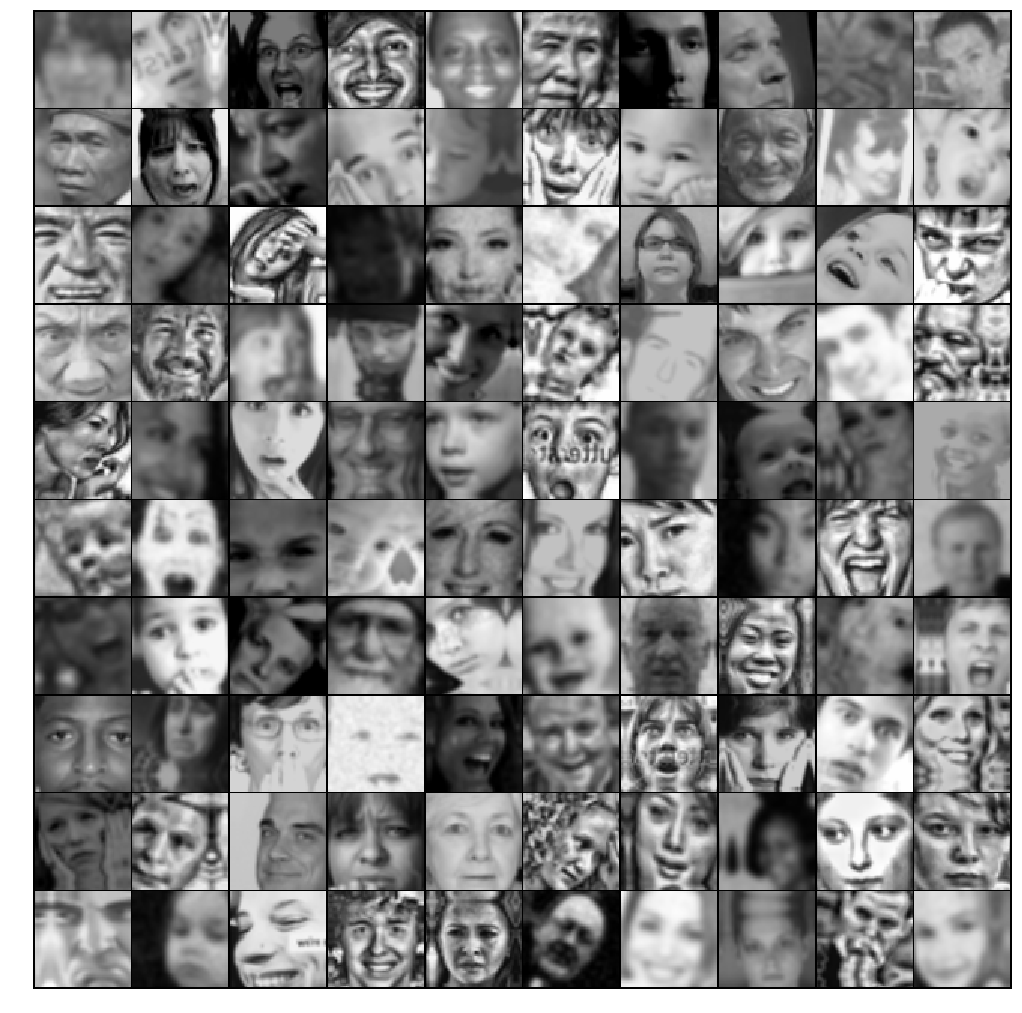

In [45]:

size_input = 64


train_transform = transforms.Compose(
    [ 
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(size_input, padding=4), 
    ])

# transformations 
normalize = mtrans.ToMeanNormalization(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )

transforms_aug = transforms.Compose([
    
    mtrans.ToResize( (48, 48), resize_mode='square', padding_mode=cv2.BORDER_REFLECT ) ,
        
    mtrans.RandomScale(factor=0.2, padding_mode=cv2.BORDER_REFLECT ), 
    mtrans.ToRandomTransform( mtrans.RandomGeometricalTransform( angle=30, translation=0.2, warp=0.02, padding_mode=cv2.BORDER_REFLECT ), prob=0.5 ),
    mtrans.ToRandomTransform( mtrans.VFlip(), prob=0.5 ),
    
    #------------------------------------------------------------------
           
    mtrans.ToRandomTransform( mtrans.RandomBrightness( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomContrast( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomGamma( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomRGBPermutation(), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.CLAHE(), prob=0.25 ),
    mtrans.ToRandomTransform( mtrans.ToGaussianBlur( sigma=0.05 ), prob=0.25 ),
      
    #mtrans.RandomRGBPermutation(),
    #mtrans.ToRandomChoiceTransform( [
    #    mtrans.RandomBrightness( factor=0.15 ), 
    #    mtrans.RandomContrast( factor=0.15 ),
    #    #mtrans.RandomSaturation( factor=0.15 ),
    #    mtrans.RandomHueSaturation( hue_shift_limit=(-5, 5), sat_shift_limit=(-11, 11), val_shift_limit=(-11, 11) ),
    #    mtrans.RandomGamma( factor=0.30  ),        
    #    mtrans.ToRandomTransform(mtrans.ToGrayscale(), prob=0.15 ),
    #    ]),    
    
    #mtrans.ToRandomTransform(mtrans.ToGaussianBlur( sigma=0.00001), prob=0.50 ),    
    
    mtrans.ToResize( (size_input+5, size_input+5), resize_mode='square', padding_mode=cv2.BORDER_REFLECT  ) ,
    mtrans.RandomCrop( (size_input, size_input), limit=2, padding_mode=cv2.BORDER_REFLECT  ) , 
    
    #------------------------------------------------------------------
    mtrans.ToGrayscale(),
    mtrans.ToTensor(),
    mtrans.ToNormalization(),
    ]) 


transforms_det = transforms.Compose([
    #mtrans.ToResize( (size_input, size_input), resize_mode='crop' ) ,
    mtrans.ToResize( (size_input, size_input), resize_mode='square', padding_mode=cv2.BORDER_REFLECT ) ,
    mtrans.ToTensor(),
    normalize,
    ])

dataloader = Dataset(
    data=FactoryDataset.factory(
        pathname=pathname, 
        name=name_dataset, 
        subset=FactoryDataset.validation, 
        #transform=train_transform, 
        download=False ),
    num_channels=3,
    transform=transforms_aug
    )


plt.figure( figsize=(18,18) )
view.visualizatedataset(dataloader, num=100, imsize=(size_input,size_input,3), padding=1 )

plt.axis('off')
plt.ioff()
plt.show()



In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable

from collections import OrderedDict
import numpy as np

def summary(model, input_size, batch_size=-1, device="cuda"):

    def register_hook(module):

        def hook(module, input, output):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)

            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()
            summary[m_key]["input_shape"] = list(input[0].size())
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(output, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in output
                ]
            else:
                summary[m_key]["output_shape"] = list(output.size())
                summary[m_key]["output_shape"][0] = batch_size

            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
            and not (module == model)
        ):
            hooks.append(module.register_forward_hook(hook))

    device = device.lower()
    assert device in [
        "cuda",
        "cpu",
    ], "Input device is not valid, please specify 'cuda' or 'cpu'"

    if device == "cuda" and torch.cuda.is_available():
        dtype = torch.cuda.FloatTensor
    else:
        dtype = torch.FloatTensor

    # multiple inputs to the network
    if isinstance(input_size, tuple):
        input_size = [input_size]

    # batch_size of 2 for batchnorm
    x = [torch.rand(2, *in_size).type(dtype) for in_size in input_size]
    # print(type(x[0]))

    # create properties
    summary = OrderedDict()
    hooks = []

    # register hook
    model.apply(register_hook)

    # make a forward pass
    # print(x.shape)
    model(*x)

    # remove these hooks
    for h in hooks:
        h.remove()

    print("----------------------------------------------------------------")
    line_new = "{:>20}  {:>25} {:>15}".format("Layer (type)", "Output Shape", "Param #")
    print(line_new)
    print("================================================================")
    total_params = 0
    total_output = 0
    trainable_params = 0
    for layer in summary:
        # input_shape, output_shape, trainable, nb_params
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]
        total_output += np.prod(summary[layer]["output_shape"])
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"] == True:
                trainable_params += summary[layer]["nb_params"]
        print(line_new)

    # assume 4 bytes/number (float on cuda).
    total_input_size = abs(np.prod(input_size) * batch_size * 4. / (1024 ** 2.))
    total_output_size = abs(2. * total_output * 4. / (1024 ** 2.))  # x2 for gradients
    total_params_size = abs(total_params.numpy() * 4. / (1024 ** 2.))
    total_size = total_params_size + total_output_size + total_input_size

    print("================================================================")
    print("Total params: {0:,}".format(total_params))
    print("Trainable params: {0:,}".format(trainable_params))
    print("Non-trainable params: {0:,}".format(total_params - trainable_params))
    print("----------------------------------------------------------------")
    print("Input size (MB): %0.2f" % total_input_size)
    print("Forward/backward pass size (MB): %0.2f" % total_output_size)
    print("Params size (MB): %0.2f" % total_params_size)
    print("Estimated Total Size (MB): %0.2f" % total_size)
    print("----------------------------------------------------------------")
    # return summary

In [2]:
import os
import sys
sys.path.append('../')
from torchlib.neuralnet import NeuralNetClassifier

pathname = os.path.expanduser( '~/.datasets' )
projectnet='../out/baselinenetruns'
no_cuda=False
seed=1
gpu=1
batch_size=10
workers=0
num_input_channels=3

print(pathname)
print(projectnet)


/home/viisar/tir/projeto/programs/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


/root/.datasets
../out/baselinenetruns


In [3]:
!ls ../out/baselinenetruns/

baseline_alexnet_cross_adam_affectnet_weights_000
baseline_alexnet_cross_adam_ferp_weights_000
baseline_cvgg13_cross_adam_affectnet_weights_000
baseline_cvgg13_cross_adam_ferp_weights_000
baseline_dexpression_cross_adam_affectnet_weights_000
baseline_dexpression_cross_adam_ferp_weights_000
baseline_fmp_cross_adam_affectnet_weights_000
baseline_fmp_cross_adam_ferp_weights_000
baseline_preactresnet18_cross_adam_affectnet_weights_000
baseline_preactresnet18_cross_adam_affectnetdark_weights_000
baseline_preactresnet18_cross_adam_ferp_weights_000
baseline_resnet18_cross_adam_affectnet_weights_000
baseline_resnet18_cross_adam_ferp_weights_000


In [19]:
name = 'baseline_resnet18_cross_adam_ferp_weights_000'
project = os.path.join(projectnet, name)
model = 'model_best.pth.tar' #'chk000025.pth.tar', model_best
pathmodels = os.path.join(project,'models',model)

print(project)
print(pathmodels)

../out/baselinenetruns/baseline_resnet18_cross_adam_ferp_weights_000
../out/baselinenetruns/baseline_resnet18_cross_adam_ferp_weights_000/models/model_best.pth.tar


In [20]:
# neuralnet
network = NeuralNetClassifier(
    patchproject=project,
    nameproject=name,
    no_cuda=no_cuda,
    seed=seed,
    gpu=gpu
    )


# load model
if network.load( pathmodels ) is not True:
    assert(False)

=> loading checkpoint '../out/baselinenetruns/baseline_resnet18_cross_adam_ferp_weights_000/models/model_best.pth.tar'
=> loaded checkpoint for resnet18 arch!


In [10]:

import torchvision
# network.net.eval()
# with torch.no_grad():
# summary( network.net, [3,224,224] )

# alexnet = torchvision.models.resnet18(pretrained=True)
# alexnet.cuda()
# summary( alexnet, (3,224,224) )


In [21]:
import torch
# x = torch.rand( 1,*[3,32,32] ).float().cuda()
# network.net( x )
network.net.cuda()
summary( network.net, ( 3,224,224 ) )


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
#Estimated Total Size (MB):
mem = { 'alexnet':107.96,
        'preactresnet18': 53.37,
        'cvgg13': 50.16,
        'fmp': 28.0,
        'resnet18': 106.01
        
      }